In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('MYMLData').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset = pd.DataFrame(data[1:], columns=data[0])
dataset = dataset.astype({'Input':'float'})
dataset = dataset.astype({'Output':'float'})

In [ ]:
dataset.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X = dataset[['Input']].values
Y = dataset[['Output']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 20)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train_scale = Scaler.transform(x_train)

In [ ]:
my_brain = Sequential([
    Dense(units = 4, activation = 'relu' , input_shape=[1]),
    Dense(units = 5),
    Dense(units = 1)

])

In [25]:
my_brain.compile(optimizer='rmsprop',loss='mse')

In [26]:
my_brain.fit(x=x_train_scale,y=y_train,epochs=20000)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 71.4580
Epoch 15336/20000
1/1 [==============================] - 0s 11ms/step - loss: 71.4581
Epoch 15337/20000
1/1 [==============================] - 0s 9ms/step - loss: 71.4580
Epoch 15338/20000
1/1 [==============================] - 0s 12ms/step - loss: 71.4581
Epoch 15339/20000
1/1 [==============================] - 0s 8ms/step - loss: 71.4581
Epoch 15340/20000
1/1 [==============================] - 0s 12ms/step - loss: 71.4581
Epoch 15341/20000
1/1 [==============================] - 0s 7ms/step - loss: 71.4580
Epoch 15342/20000
1/1 [==============================] - 0s 13ms/step - loss: 71.4581
Epoch 15343/20000
1/1 [==============================] - 0s 7ms/step - loss: 71.4580
Epoch 15344/20000
1/1 [==============================] - 0s 7ms/step - loss: 71.4580
Epoch 15345/20000
1/1 [==============================] - 0s 7ms/step - loss: 71.4580
Epoch 15346/20000
1/1 [=====

In [27]:
loss_df = pd.DataFrame(my_brain.history.history)

<Axes: >

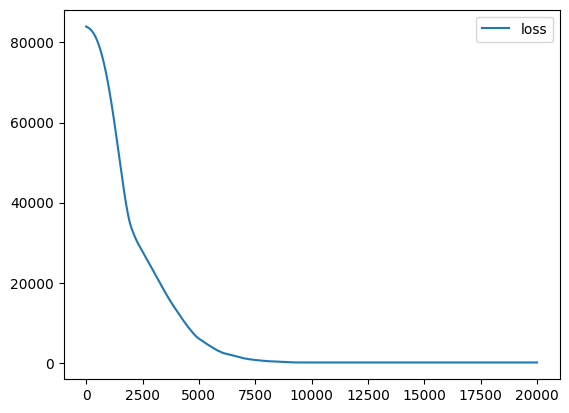

In [28]:
loss_df.plot()

In [29]:
x_test1 = Scaler.transform(x_test)

In [30]:
my_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 152ms/step - loss: 134.7491


134.74908447265625

In [31]:
X_n1 = [[30]]

In [32]:
input_scaled = Scaler.transform(X_n1)

In [33]:
input_scaled

array([[1.52631579]])

In [34]:
my_brain.predict(input_scaled)

1/1 [==============================] - 0s 107ms/step


array([[1747.0533]], dtype=float32)